# Social Media Sentiment Analysis Using Twitter Dataset


# Introduction

 Social media sentiment analysis is the process of using natural language processing and machine learning techniques to identify, extract, and quantify the emotional tone and sentiment expressed in social media data. In recent years, social media platforms such as Twitter have become an important source of data for sentiment analysis. With over 300 million active users, Twitter is a valuable source of real-time information on a wide range of topics, including news events, political developments, and brand sentiment.

Twitter sentiment analysis involves analyzing large volumes of Twitter data to identify the sentiment expressed in each tweet, whether it is positive, negative, or neutral. This can be achieved by applying various natural language processing techniques, including sentiment analysis algorithms, machine learning classifiers, and text mining techniques.

The Twitter dataset used for sentiment analysis typically includes a collection of tweets related to a specific topic or event. These tweets can be collected using various methods, including web scraping and Twitter's API. Once the dataset has been collected, it can be pre-processed to remove noise and irrelevant data, such as retweets, links, and hashtags.

After pre-processing, the dataset can be analyzed using various techniques to identify sentiment patterns and trends. These techniques may include text classification algorithms, sentiment lexicons, and machine learning models. The output of the analysis may include metrics such as the overall sentiment score, the most frequently used words and phrases, and the sentiment trends over time.

Social media sentiment analysis has many applications, including brand management, marketing research, political analysis, and customer service. By analyzing social media data, businesses and organizations can gain valuable insights into customer opinions and preferences, and make data-driven decisions to improve their products and services.

# Abstract

Social media sentiment analysis is a technique used to identify the emotions and opinions expressed in online content. With the increasing use of social media, sentiment analysis has become an essential tool for businesses, organizations, and governments to understand the public's opinions and attitudes. In this project, we will focus on sentiment analysis using Twitter data.

The dataset used in this project is a collection of tweets obtained from Twitter's API. The dataset contains tweets on various topics, including politics, sports, entertainment, and technology. The first step in the analysis is data cleaning, where we remove irrelevant information such as links, hashtags, and mentions.

We then use Natural Language Processing (NLP) techniques to perform sentiment analysis on the tweets. We use the Vader sentiment analysis tool to determine the positive, negative, or neutral sentiment of each tweet. We also perform topic modeling to identify the topics that are most prevalent in the tweets.

The results of the analysis are visualized using various graphs and charts, including word clouds, bar charts, and scatter plots. These visualizations help to understand the overall sentiment and topics of discussion on Twitter. The analysis can be used to identify the public's opinion on a particular topic or brand and can be helpful in making informed decisions.

In conclusion, this project demonstrates the use of sentiment analysis on Twitter data to understand the public's opinions and attitudes. The results of this analysis can be beneficial for businesses, organizations, and governments to make informed decisions based on the sentiment of the public.






# Problem Definition

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# Solution

To solve this problem, we will follow the typical machine learning pipeline. We will first import the required libraries and the dataset. We will then do exploratory data analysis to see if we can find any trends in the dataset. Next, we will perform text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally, we will use machine learning algorithms to train and test our sentiment analysis models.

# Importing the Required Libraries

The first step as always is to import the required libraries:

In [27]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
airline_tweets = pd.read_csv("C:/Users/ambee/OneDrive/Desktop/Tweets.csv")

In [29]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [30]:
airline_tweets.shape

(14640, 15)

### Data Cleaning

In [31]:
airline_tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [25]:
airline_tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [33]:
airline_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### we can say that "air_sentiment_gold", negativereason_gold", "tweet_coord" columns have max null values, so we are going to delete those columns, as they don't effect our data

In [35]:
columns_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
airline_tweets = airline_tweets.drop(columns=columns_to_drop)
airline_tweets.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [44]:
column_description = airline_tweets['negativereason_confidence'].describe()
print(column_description)


count    10522.000000
mean         0.638298
std          0.330440
min          0.000000
25%          0.360600
50%          0.670600
75%          1.000000
max          1.000000
Name: negativereason_confidence, dtype: float64


In [45]:
median_value = airline_tweets['negativereason_confidence'].median()
airline_tweets['negativereason_confidence'].fillna(median_value, inplace=True)


In [46]:
null_count = airline_tweets['negativereason_confidence'].isnull().sum()
print(f"Number of null values in 'negativereason_confidence': {null_count}")


Number of null values in 'negativereason_confidence': 0


###### Using the median , imputeded the negativereason_confidence column

In [47]:
column_description1 = airline_tweets['user_timezone'].describe()
print(column_description2)

count           9907
unique          3081
top       Boston, MA
freq             157
Name: tweet_location, dtype: object


In [48]:
mode_value = airline_tweets['user_timezone'].mode()[0]
airline_tweets['user_timezone'].fillna(mode_value, inplace=True)


In [49]:
column_description2 = airline_tweets['tweet_location'].describe()
print(column_description2)

count          14640
unique          3081
top       Boston, MA
freq            4890
Name: tweet_location, dtype: object


In [50]:
mode_value = airline_tweets['tweet_location'].mode()[0]
airline_tweets['tweet_location'].fillna(mode_value, inplace=True)

In [52]:
column_description3 = airline_tweets['negativereason'].describe()
print(column_description2)

count          14640
unique          3081
top       Boston, MA
freq            4890
Name: tweet_location, dtype: object


In [53]:
airline_tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [54]:
mode_value = airline_tweets['negativereason'].mode()[0]
airline_tweets['negativereason'].fillna(mode_value, inplace=True)

###### we are filling the null values with Customer Service Issue, as it occur more frequently

In [58]:
airline_tweets.negativereason.value_counts()

Customer Service Issue         8372
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [59]:
airline_tweets.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

###### so we are done with null values, now our data is without impurities

# Data Analysis

#### Let's explore the dataset a bit to see if we can find any trends.By Visulization:
### UNIVARIATE
### BIVARIATE
### MULTIVARIATE

In [64]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 6
plot_size[1] = 5
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='airline'>

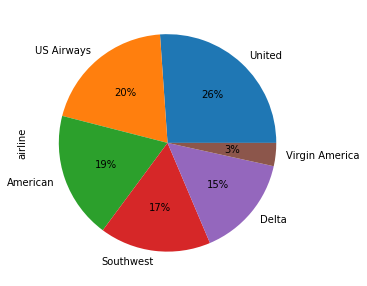

In [65]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In the output, you can see the percentage of public tweets for each airline. United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).



Let's now see the distribution of sentiments across all the tweets. 

<AxesSubplot:ylabel='airline_sentiment'>

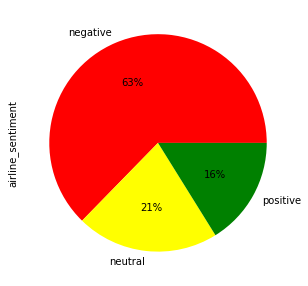

In [66]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

From the output, you can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

Next, let's see the distribution of sentiment for each individual airline,

<AxesSubplot:xlabel='airline'>

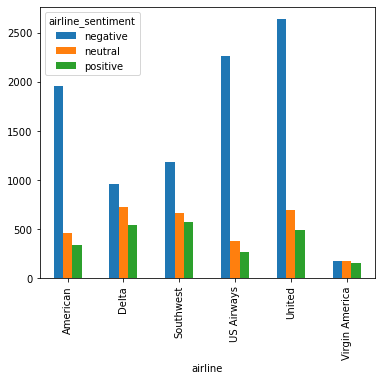

In [67]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories. 

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

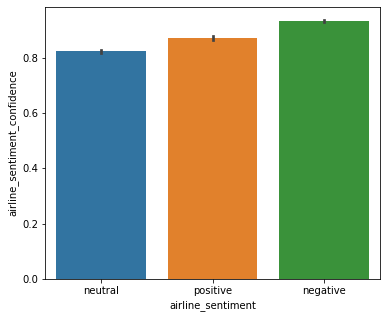

In [68]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

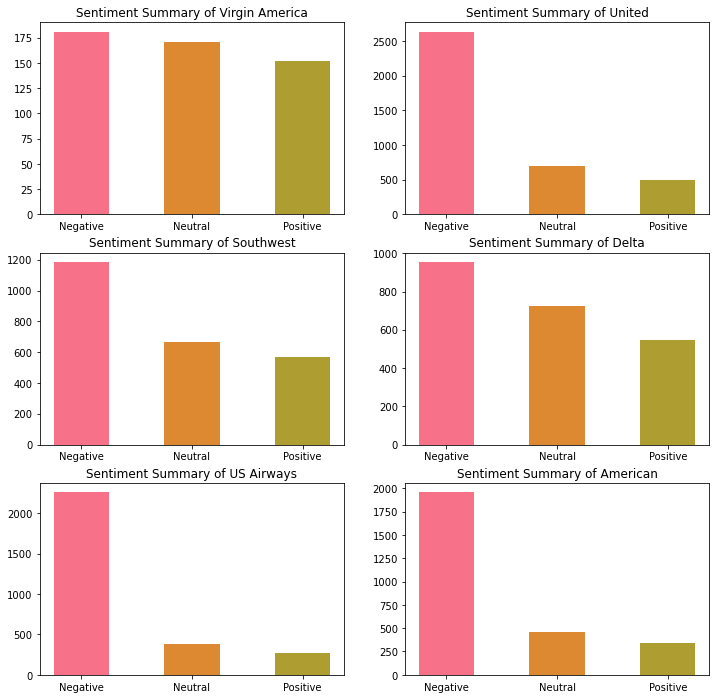

In [69]:
def plot_sub_sentiment(Airline):
    pdf = airline_tweets[airline_tweets['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = airline_tweets['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [70]:
#counting the total number of negative reasons
airline_tweets.negativereason.value_counts()

Customer Service Issue         8372
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

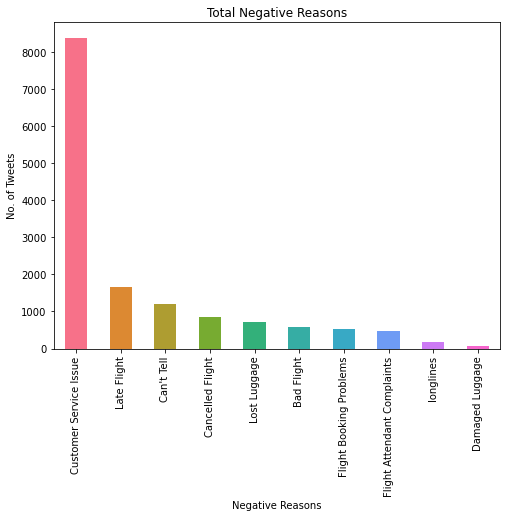

In [71]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(airline_tweets["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

### PREPROCESSING

In [80]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer